# Midterm Exam

Please read each question carefully and write your code.<br>
Feel free to use one or more cells to solve each question.

When submitting, rename the file to midterm_[student_id].ipynb (ex.midterm_20211234.ipynb) and submit it to PLMS.

In [1]:
# DO NOT import any external libraries other than these.
# There will be a penalty for importing external libraries for any reason.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.manifold import TSNE
%matplotlib inline

We will use the following datasets in `data` folder.
- `disney_movies_total_gross.csv`
- `disney-characters.csv`

Read the csv files and load them into dataframes named `gross_df` and `chracter_df` respectively.

In [2]:
gross_df = pd.read_csv('./data/disney_movies_total_gross.csv', encoding='latin1')
character_df = pd.read_csv(
    './data/disney-characters.csv', encoding='latin1')


In [3]:
gross_df.head()

,index,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


In [4]:
character_df.head()

,index,movie_title,release_date,hero,villian,song
0,0,\nSnow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,1,\nPinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
2,2,\nFantasia,"November 13, 1940",NaN,Chernabog,NaN
3,3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
4,4,\nBambi,"August 13, 1942",Bambi,Hunter,Love Is a Song


## Q1
For both dataframes, print the number of nan values in each column and delete the rows with one or more nan values.

In [9]:
gross_df.isna().sum()

index                       0
movie_title                 0
release_date                0
genre                       0
MPAA_rating                 0
total_gross                 0
inflation_adjusted_gross    0
dtype: int64

In [10]:
character_df.isna().sum()

index           0
movie_title     0
release_date    0
hero            0
villian         0
song            0
dtype: int64

In [7]:
gross_df = gross_df.dropna(axis=0)

In [8]:
character_df = character_df.dropna(axis=0)

## Q2
For `gross_df`, remove `$`, `,` in `total_gross` column and change to integer.

In [13]:
gross_df['total_gross'] = gross_df['total_gross'].apply(lambda x: x.replace(',','').strip('$'))
gross_df = gross_df.astype({'total_gross': 'int'})

In [15]:
gross_df.head()

,index,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,184925485,"$5,228,953,251"
1,1,Pinocchio,"Feb 9, 1940",Adventure,G,84300000,"$2,188,229,052"
2,2,Fantasia,"Nov 13, 1940",Musical,G,83320000,"$2,187,090,808"
3,3,Song of the South,"Nov 12, 1946",Adventure,G,65000000,"$1,078,510,579"
4,4,Cinderella,"Feb 15, 1950",Drama,G,85000000,"$920,608,730"


For `gross_df`, create a new column called `title_length` with the value 'long' if the movie title has more than 6 words, otherwise 'short'.

In [16]:
gross_df['title_length'] = gross_df['movie_title'].apply(lambda x: 'long' if len(x.split(' ')) > 6 else 'short')

In [17]:
gross_df.head()

,index,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,title_length
0,0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,184925485,"$5,228,953,251",short
1,1,Pinocchio,"Feb 9, 1940",Adventure,G,84300000,"$2,188,229,052",short
2,2,Fantasia,"Nov 13, 1940",Musical,G,83320000,"$2,187,090,808",short
3,3,Song of the South,"Nov 12, 1946",Adventure,G,65000000,"$1,078,510,579",short
4,4,Cinderella,"Feb 15, 1950",Drama,G,85000000,"$920,608,730",short


For `character_df`, remove `/n` in `movie_title`.

In [22]:
character_df['movie_title'] = character_df['movie_title'].apply(lambda x: x.replace('\n', ''))

In [23]:
character_df.head()

,index,movie_title,release_date,hero,villian,song
0,0,Snow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,1,Pinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
2,2,Fantasia,"November 13, 1940",NaN,Chernabog,NaN
3,3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
4,4,Bambi,"August 13, 1942",Bambi,Hunter,Love Is a Song


For both dataframe, create a new column called `year` where the value is an interger that represents the year the movie was released.

In [24]:
gross_df['year'] = gross_df['release_date'].apply(lambda x: int(x.split(' ')[2]))

In [26]:
character_df['year'] = character_df['release_date'].apply(
    lambda x: int(x.split(' ')[2]))

In [28]:
gross_df.head()

,index,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,title_length,year
0,0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,184925485,"$5,228,953,251",short,1937
1,1,Pinocchio,"Feb 9, 1940",Adventure,G,84300000,"$2,188,229,052",short,1940
2,2,Fantasia,"Nov 13, 1940",Musical,G,83320000,"$2,187,090,808",short,1940
3,3,Song of the South,"Nov 12, 1946",Adventure,G,65000000,"$1,078,510,579",short,1946
4,4,Cinderella,"Feb 15, 1950",Drama,G,85000000,"$920,608,730",short,1950


In [29]:
character_df.head()

,index,movie_title,release_date,hero,villian,song,year
0,0,Snow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come,1937
1,1,Pinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star,1940
2,2,Fantasia,"November 13, 1940",NaN,Chernabog,NaN,1940
3,3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine,1941
4,4,Bambi,"August 13, 1942",Bambi,Hunter,Love Is a Song,1942


## Q3
Generate a new dataframe called `data` with movie title, year, genre, hero, and total_gross and as columns. <br>
When generating a dataframe, use method that **does not produce nan values**. <br>
Note that the pair of `movie_title` and `year` is unique for each movie. <br>

In [30]:
data = pd.merge(character_df, gross_df, how='inner', on=['movie_title', 'year'])
data = data.drop(['index_x', 'release_date_x', 'villian',
                 'song', 'index_y', 'release_date_y', 'MPAA_rating', 'inflation_adjusted_gross', 'title_length'], axis=1)


In [33]:
data.head()

,movie_title,hero,year,genre,total_gross
0,Snow White and the Seven Dwarfs,Snow White,1937,Musical,184925485
1,Pinocchio,Pinocchio,1940,Adventure,84300000
2,Fantasia,NaN,1940,Musical,83320000
3,Cinderella,Cinderella,1950,Drama,85000000
4,Lady and the Tramp,Lady and Tramp,1955,Drama,93600000


In `data` dataframe, print which genre has the highest average total gross. <br>
Note that the output must be a string.

In [34]:
temp_data = data.groupby(['genre']).mean()
temp_data = temp_data.sort_values(
    by='total_gross', ascending=False).reset_index()


In [35]:
print(temp_data.iloc[0]['genre'])

Adventure


Use seaborn to draw a barplot that shows total_gross of each genre in `gross_df`.

<AxesSubplot:xlabel='genre', ylabel='total_gross'>

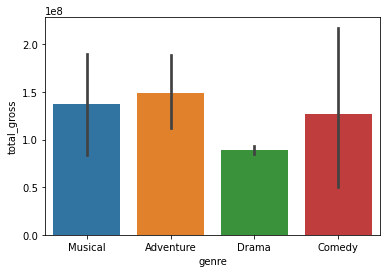

In [36]:
sns.barplot(data=data, x='genre', y='total_gross')

## Q4
For question 4, We will use the following dataset in `data` folder.
- `disney_revenue_1991-2016.csv`

Read the csv file and load it into a dataframe named `revenue_df`.

In [37]:
revenue_df = pd.read_csv(
    './data/disney_revenue_1991-2016.csv', encoding='latin1')


In [38]:
revenue_df.head()

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Total
0,1991,2593.0,724.0,NaN,2794.0,6111
1,1992,3115.0,1081.0,NaN,3306.0,7502
2,1993,3673.4,1415.1,NaN,3440.7,8529
3,1994,4793.0,1798.2,NaN,3463.6,10414
4,1995,6001.5,2150.0,NaN,3959.8,12525


Use matplotlib to draw a line graph that shows total revenue for each year from `revenue_df`. <br>
Set x-axis to 'Year' and y-axis to 'Total_Revenue'. <br>
Note that the `Total` in revenue_df represents the total revenue for each year.

Text(0, 0.5, 'Total_Revenue')

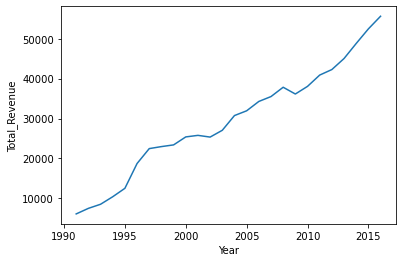

In [39]:
plt.plot(revenue_df['Year'], revenue_df['Total'])
plt.xlabel("Year")
plt.ylabel("Total_Revenue")

Drop the column named `Total` in `revenue_df` and fill all nan values with zeros.<br>

In [40]:
revenue_df = revenue_df.drop(['Total'], axis=1)

In [41]:
revenue_df = revenue_df.fillna(0)

In [42]:
revenue_df.head()

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts
0,1991,2593.0,724.0,0.0,2794.0
1,1992,3115.0,1081.0,0.0,3306.0
2,1993,3673.4,1415.1,0.0,3440.7
3,1994,4793.0,1798.2,0.0,3463.6
4,1995,6001.5,2150.0,0.0,3959.8


Perform dimensionality reduction using t-SNE. The size of the reduced dimension is 2.<br>
Print a dataframe with column names 'component_0' and 'component_1', with each row representing the output of tsne.

In [44]:
model = TSNE(n_components=2, learning_rate='auto', init='random')
tsne_df = pd.DataFrame(model.fit_transform(revenue_df))
tsne_df.columns = ["component_0", "component_1"]

In [45]:
tsne_df

,component_0,component_1
0,11.110473,3.749811
1,-28.540583,21.641142
2,10.136925,-14.783982
3,24.953037,-6.377335
4,44.178711,-35.492416
5,40.855122,-16.517229
6,24.943600,-25.361738
7,-19.919724,-12.692528
8,-31.636921,-27.298250
9,24.860432,-45.696964


## Q5
1. Create and connect a database named `temp.db`.<br>
2. Create a table named `Wine` and insert following data and save the changes. <br>

    | City      | Price | Type | Rating |
    | :- | :- | :- | :- |
    | Seattle  | 10   | 1  | 4.75   | 
    | Boston  | 17   | 2  | 4.02   | 
    | Pittsburgh  | 20   | 1  | 3.33   | 
    | San Diego | 9    | 1  | 3.87   | 

In [47]:
con = sqlite3.connect("temp.db")
cur = con.cursor()

cur.execute(
    'create table Wine(City text, Price integer, Type integer, Rating real)')
cur.executemany(
    'insert into Wine values (?, ?, ?, ?)',
    [
        ('Seattle', 10, 1, 4.75),
        ('Boston', 17, 2, 4.02),
        ('Pittsburgh', 20, 1, 3.33),
        ("San Diego", 9, 1, 3.87)
    ]
)
con.commit()

con.close()

Print the names of cities with Type 1 wines rated higher than 4.0.<br>
You may print the result in the form of a list of tuples.

In [48]:
con = sqlite3.connect("temp.db")
cur = con.cursor()

cur.execute(
    'select City from Wine where Type = 1 and Rating > 4.0')
rows = cur.fetchall()

print(rows)

con.close()


[('Seattle',)]


Print the average price and rating by Type.

In [51]:
con = sqlite3.connect("temp.db")
cur = con.cursor()

cur.execute(
    'select avg(Price), avg(Rating) from Wine group by Type')
rows = cur.fetchall()

print(rows)

con.close()


[(13.0, 3.983333333333333), (17.0, 4.02)]
